In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sketch
import seaborn as sns
#SKETCH_USE_REMOTE_LAMBDAPROMPT=False (2) OPENAI_API_KEY=YOUR_API_KEY

/home/gaulight/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.2' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
df = pd.read_csv('../data/boston_reviews.csv') 

df.head()

<ipython-input-3-197cd385606a>:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/boston_reviews.csv')


,review_id,deets_id,name,address,num_reviews,overall_rating,user_name,url,local_guide,user_num_reviews,user_num_photos,dine_in_out,meal,price_range,other,extra,rating,time,text,image_urls
0,22a022e46bcf28ce128d423e7bf3513d334c800afd69db...,1,[FoMu],"481 Cambridge St, Allston, MA 02134, USA",218.0,4.5,Helen Lindsay,https://www.google.com/maps/contrib/1110956048...,True,105,285,NaN,NaN,NaN,NaN,NaN,5.0,9 months ago,My favorite vegan ice cream in the city. I alw...,['https://lh5.googleusercontent.com/p/AF1QipMR...
1,a31d1320ec9ecde373c0c452836b866252aec3e8faa8af...,1,[FoMu],"481 Cambridge St, Allston, MA 02134, USA",218.0,4.5,Jasmine,https://www.google.com/maps/contrib/1142140572...,True,92,278,NaN,NaN,NaN,NaN,NaN,3.0,8 months ago,EVERYTHING here is vegan.. including the toppi...,['https://lh5.googleusercontent.com/p/AF1QipO3...
2,e89c62dde818c19566bba07a81e17f90a358145763d71b...,1,[FoMu],"481 Cambridge St, Allston, MA 02134, USA",218.0,4.5,Nero T,https://www.google.com/maps/contrib/1002633278...,True,"1,095","1,368",NaN,NaN,NaN,NaN,NaN,5.0,11 months ago,"Spectacular, vegan, coconut based ice cream. T...",['https://lh5.googleusercontent.com/p/AF1QipOB...
3,76694b1279a98fdcc042b914b9d08f42f7a9932c04a10e...,1,[FoMu],"481 Cambridge St, Allston, MA 02134, USA",218.0,4.5,Eric Wenzel,https://www.google.com/maps/contrib/1159707828...,True,135,75,NaN,NaN,NaN,NaN,NaN,4.0,8 months ago,Hip vegan ice cream desserts.Good flavor. Woul...,['https://lh5.googleusercontent.com/p/AF1QipNL...
4,f25f2aa5c4f872f246152db9f0fb1efa6e563d2facbe12...,1,[FoMu],"481 Cambridge St, Allston, MA 02134, USA",218.0,4.5,Melissa Loteczka,https://www.google.com/maps/contrib/1019018864...,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5 months ago,Staff is rude. I was charged more than double ...,['https://lh5.googleusercontent.com/p/AF1QipP5...


In [4]:
if 'image_urls' in df.columns:
    df.drop(columns='image_urls', inplace=True)
df['num_reviews'] = df['num_reviews'].fillna(0)
df['num_reviews'] = df['num_reviews'].replace('None', 0)
df['num_reviews'] = df['num_reviews'].astype(int)
df['user_num_reviews'] = df['num_reviews'].fillna(0)
df['user_num_reviews'] = df['num_reviews'].replace('None', 0)
df['user_num_reviews'] = df['num_reviews'].astype(int)


In [7]:
df.sketch.ask("Which columns are integer type?")

In [8]:
df.sketch.ask("Can you give me friendly names of the columns and descriptions of the contents?")

| Column Name     | Description                                                                                      |
|-----------------|--------------------------------------------------------------------------------------------------|
| index           | This column contains the row index of the dataframe.                                            |
| review_id       | This column contains a unique identifier for each review.                                       |
| deets_id        | This column contains a unique identifier for each business.                                     |
| name            | This column contains the name of the business.                                                  |
| address         | This column contains the address of the business.                                               |
| num_reviews     | This column contains the total number of reviews for the business.                              |
| overall_rating  | This column contains the overall rating of the business.                                        |
| user_name       | This column contains the name of the user who wrote the review.                                  |
| url             | This column contains a link to the business's Google Maps page.                                  |
| local_guide     | This column indicates whether or not the user is a local guide.                                  |
| user_num_reviews| This column contains the total number of reviews written by the user.                            |
| user_num_photos | This column contains the total number of photos uploaded by the user.                            |
| dine_in_out     | This column indicates whether or not the user dined in or out at the business.                   |
| meal            | This column indicates what type of meal was eaten at the business (e.g., breakfast, lunch, dinner).|
| price_range     | This column indicates what price range was associated with the meal (e.g., cheap, moderate, expensive).|
| other           | This column indicates any other information associated with the review (e.g., dietary restrictions).|
| extra           | This column indicates any additional information associated with the review (e.g., comments).   |
| rating          | This column contains a numerical rating given by the user (on a scale from 1-5).                 |
| time            | This column indicates when the review was written (e.g., "9 months ago").                       |
| text            | This column contains a text description of the review written by the user.                      |

In [9]:
df.sketch.howto("what business got the most reviews?")

In [26]:
# Get the name of the business with the most reviews
most_reviewed_business = df['name'].value_counts().idxmax()

# Get the number of reviews for the most reviewed business
num_reviews = df[df['name'] == most_reviewed_business]['num_reviews'].max()

print(f"The business with the most reviews is {most_reviewed_business} with {num_reviews} reviews.")

The business with the most reviews is Dunkin' with 846 reviews.


In [11]:
df.sketch.howto("how do I replace None with 0 in num_reviews?")

In [24]:
df.sketch.howto("how do I replace 'None' with 0 in num_reviews?")

In [21]:
df.sketch.howto("how do I make num_reviews an integer type?")

In [27]:
df.sketch.howto("what user made the most reviews?")

In [15]:
# Get the user with the most reviews
user_reviews = df.groupby('user_name')['review_id'].count().reset_index(name='num_reviews')
most_reviews = user_reviews.sort_values(by='num_reviews', ascending=False).head(1)
name = most_reviews['user_name'].iloc[0]
num  = most_reviews['num_reviews'].iloc[0]
# Print the user with the most reviews
print(f'The user with the most reviews is: {name} with {num} reviews.')

The user with the most reviews is: Jea Kim with 278 reviews.


In [41]:
df.sketch.howto("plot with horizontal bars the number of reviews based on time")

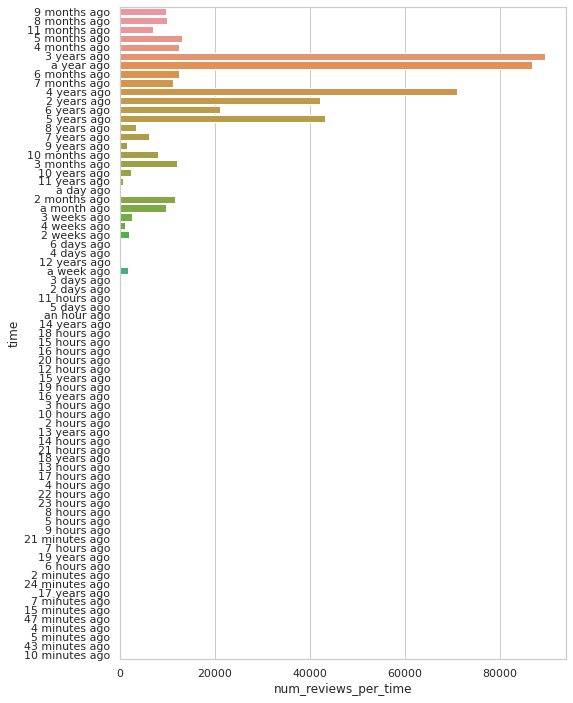

In [17]:
# create a new column with the number of reviews per time period
df['num_reviews_per_time'] = df.groupby('time')['review_id'].transform('count')

# plot the data using seaborn
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(8, 12)) # adjust the size here
sns.barplot(y="time", x="num_reviews_per_time", data=df, ax=ax)
fig.savefig('../figs/reviewsOverTime.png', bbox_inches = 'tight')
plt.show()
df.drop(columns='num_reviews_per_time', inplace=True)

In [49]:
df.sketch.howto("plot the number of reviews of a user based on their rank")

In [9]:
user_reviews_max = df.groupby('user_name')['user_num_reviews'].max()
user_reviews_max.head()

user_name
# Essadiki          471
#1football dad      350
#ANHNONGDAN USA     485
#FBCB 617           241
#NoRush #AT4LIFE    324
Name: user_num_reviews, dtype: int64

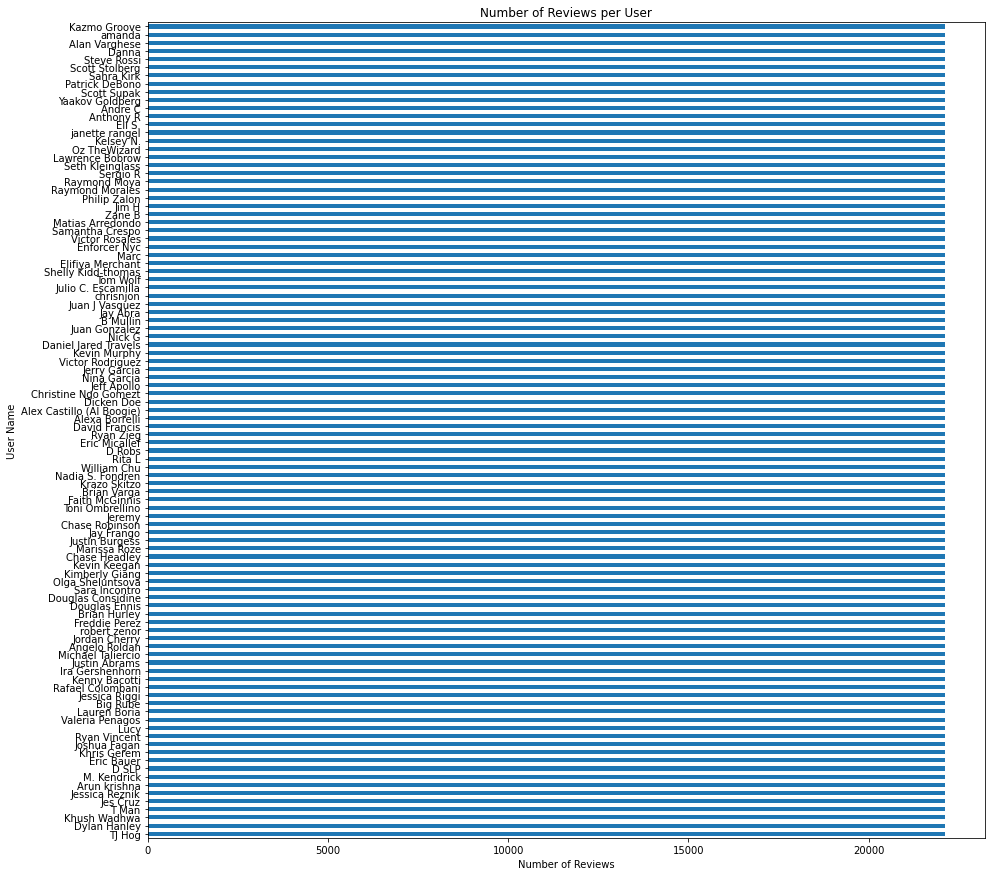

In [13]:
# Get the number of reviews for each user (note that gpt said .sum which is wrong)
user_reviews = df.groupby('user_name')['user_num_reviews'].max()
most_reviews = user_reviews.sort_values(ascending=False )

# Plot the number of reviews per user
most_reviews.head(100).plot(kind='barh', figsize=(15,15))
plt.title('Number of Reviews per User')
plt.ylabel('User Name')
plt.xlabel('Number of Reviews')
plt.show()

In [14]:
most_reviews.head()

user_name
TJ Hog          22112
Dylan Hanley    22112
Khush Wadhwa    22112
T Man           22112
Jes Cruz        22112
Name: user_num_reviews, dtype: int64

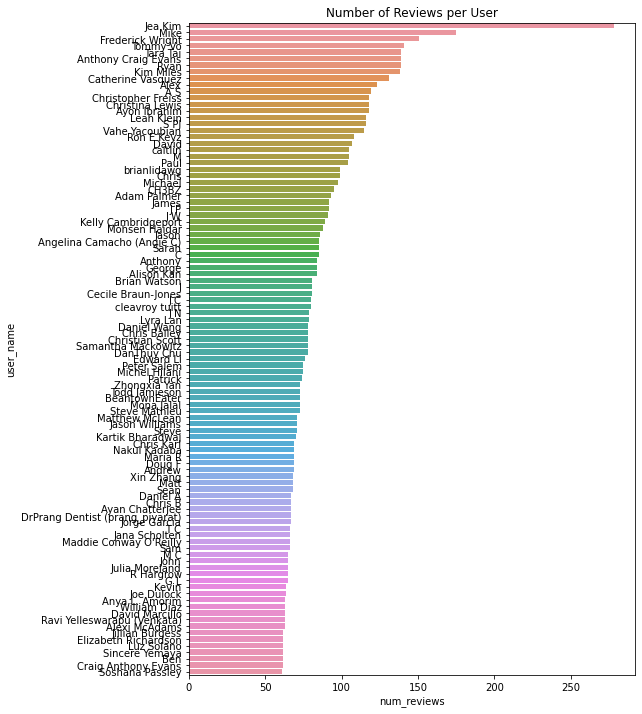

In [15]:
user_reviews = df.groupby('user_name')['review_id'].count().reset_index(name='num_reviews')
most_reviews2 = user_reviews.sort_values(by='num_reviews', ascending=False)

fig, ax = plt.subplots(figsize=(8, 12)) # adjust the size here
plt.title('Number of Reviews per User')
sns.barplot(y="user_name", x="num_reviews", data=most_reviews2.head(100), ax=ax)
fig.savefig('../figs/reviewsPerUserTop100.png', bbox_inches = 'tight')
plt.show()


In [18]:
most_reviews2.sketch.howto("make a box and whiskers plot for num_reviews")

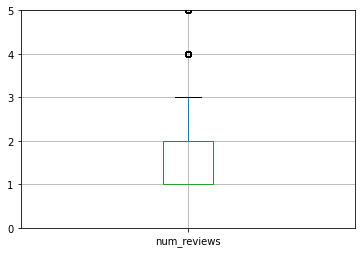

In [6]:
most_reviews2.boxplot(column='num_reviews')
plt.gca().set_ylim([0, 5]) #
# show the plot
plt.show()

In [21]:
most_reviews2.sketch.ask("what percentage of rows have the value of 1 for num_reviews?")

In [1]:
most_reviews2.sketch.ask("what percentage of rows have the value of 2 for num_reviews?")

NameError: name 'most_reviews' is not defined

In [8]:
percent_one_review = (most_reviews2['num_reviews'].value_counts(normalize=True)[1]) * 100
print("Percentage of rows with 1 review: {:.2f}%".format(percent_one_review))

Percentage of rows with 1 review: 69.82%


In [11]:
most_reviews2.sketch.howto("plot a histogram for num_reviews with 1 to 50 being the x axis limits")

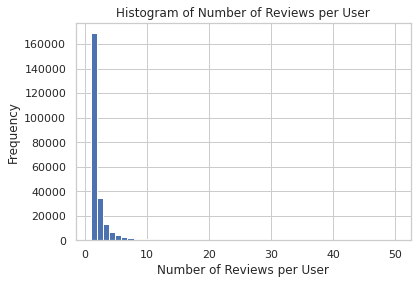

In [22]:
fig2, ax = plt.subplots() # figsize=(8, 12))  adjust the size here

plt.hist(most_reviews2['num_reviews'], bins=50, range=(1,50))

# Add labels and title
plt.xlabel('Number of Reviews per User')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Reviews per User')

# Show the plot
fig2.savefig('../figs/reviewsPerUserHistogram.png', bbox_inches = 'tight')

plt.show()
